## Анализ геоданных в Python

**Подготовил:** Гайфуллин Дмитрий, январь 2021 г.

**Цель ноутбука:** рассмотрение библиотек и фреймворков для работы с геоданными в Python.

В данном ноутбуке будут рассмотрены такие библиотеки для работы с геоданными, как:
   - Shapely
   - Geopandas
   - Folium
   
Также рассмотрим, какие карты есть в свободном доступе:
   - OpenStreetMap
   - Выгрузка данных из OSM
   - Карты ДТП
   - OSMNX
   
Пойдем от легкого к сложному.

### Карты

**OpenStreetMap**

[OpenStreetMap](https://www.openstreetmap.org/#map=17/40.78926/-73.95789), сокращённо OSM — некоммерческий веб-картографический проект по созданию силами сообщества участников — пользователей Интернета подробной свободной и бесплатной географической карты мира. Привлекательность OSM — в возможности совершенно легально использовать качественную картографическую информацию.

OpenStreetMap использует топологическую структуру данных, состоящую из объектов:
   - node (точка) — точка с указанными координатами;
   - way (линия) — упорядоченный список точек, составляющих линию или полигон;
   - relation (отношение) — группы точек, линий и других отношений, которым назначаются некоторые свойства;
   - tag (тег) — пары «ключ — значение», могут назначаться точкам, линиям и отношениям.

Для того, чтобы иметь возможность использовать информацию OSM, можно воспользоваться Overpass API. О том, как это сделать, написано [здесь](https://zen.yandex.ru/media/nuancesprog/poluchaem-dannye-open-street-map-v-python-5eebb6aa3d690b297323ba5c).\
Также дополнительную информацию можно посмотреть в конце ноутбука.

![](https://ulpressa.ru/wp-content/uploads/old/OpenStreetMap.png)

**Выгрузка данных из OSM**

Опытные пользователи OpenStreetMap знают, что этот сервис не позволяет экспортировать данные, размером больше небольшого посёлка. У него есть ограничение на экспортируемую площадь и на количество экспортируемых узлов (не более 50 000 на середину 2018 года). Поэтому для экспорта необходимо использовать другие онлайн-сервисы.

**Planet OSM** (бесплатный сервис)

На портале [Planet OSM](https://planet.openstreetmap.org/) представлены выгрузки различных данных из карт OSM. Они обновляются с различной периодичностью: ежедневно, еженедельно и т.д.

![](osm_planet.JPG)

**GeoFabrik** (бесплатный сервис)

Для получения карт по географическим регионам можно воспользоваться бесплатным сервисом [GeoFabrik](http://download.geofabrik.de/). На нем можно либо сразу выкачивать нужный регион, либо кликнуть на название региона и получить список более мелких суб-регионов. Так можно добраться до самых маленьких регионов размером примерно с округ (две-три области в России).

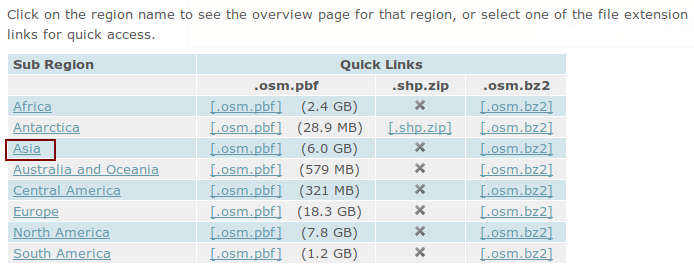

**Bbbike** (бесплатный сервис)

[Bbbike](https://extract.bbbike.org/) - это сервис, нацеленный на путешественников, которые перемещаются на велосипедах. На его странице экспорта есть возможность выбрать произвольный регион.\
Следует выделить на карте нужную местность, и в полях ввода указать свой адрес e-mail и придумать название выделенной карте. Так как "вытяжка" конкретной карты местности на сервисе происходит из planet.osm, то на это требуется некоторое время. Результат будет готов через 15-30 минут в зависимости от размера площади карты и нагрузки на сервис. Как только процесс экстракции карты завершится, пользователь будет оповещён на оставленный им адрес e-mail.\
Немаловажно, что сервис даёт возможность скачать карту не только в формате OSM, но и конвертировать его в уже готовые форматы Garmin, Navit, Esri.

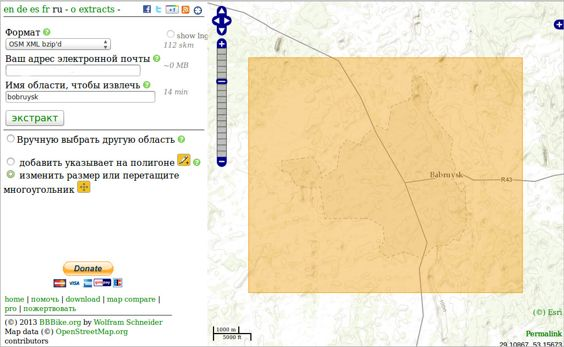

**NextGis** (платный сервис)

[Данный сайт](https://data.nextgis.com/ru/) поставляет векторные данные за деньги.\
Он предлагает следующие форматы выгрузки:
   - Shape (QGIS);
   - Shape (ArcGIS);
   - Geodatabase (ArcGIS);
   - GeoJSON (QGIS);
   - TAB (Mapinfo);
   - PDF;
   - CSV (Excel);
   - Возможна выгрузка и в другие форматы по запросу.

**OSMNX**

Отдельного упоминания заслуживает библиотека **OSMNX** - еще одна библиотека, которая позволяет загружать, обрабатывать, визуализировать, анализировать уличные сети Open Street Map.\
Установка: 
```python 
!conda config --prepend channels conda-forge
```
OSMnx построен на основе GeoPandas, NetworkX и matplotlib и дает возможность:
   - скачивать и моделировать уличные сети или другую сетевую инфраструктуру в любой точке мира;
   - загружать любую другую пространственную геометрию: границы мест, контуры зданий или достопримечательности в виде GeoDataFrame;
   - скачивать на автомобильные, пешие, велосипедные уличные сети и многое другое.

Простыми командами мы можем получить карту дорожных сетей, передав в bounding box соответствующие координаты. Другие примеры представлены [здесь](https://github.com/gboeing/osmnx-examples).
```python
G = ox.graph_from_bbox(lat_max, lat_min, lon_max, lon_min, network_type='drive')
ox.plot_graph(G, fig_height=20, fig_width=20);
```
Получаем:
<p style="text-align: left;"> <img src="osmnx.JPG" width=400 height=100> </p>


**Карты ДТП**

Также существуют открытые базы данных с информацией о дорожно-транспортных происшествиях.\
Например, карты с информацией о дтп расположены [здесь](https://dtp-stat.ru/) и [здесь](https://скдф.рф/traffic-accidents/81816946).
![](https://habrastorage.org/webt/l6/9w/_w/l69w_wh08tr_4odcyjz6cv5bwza.png)

Более подробную информацию можно получить [здесь](https://habr.com/ru/post/438700/).

### Форматы данных

1. Для координат это часто формат CSV, текстовые файлы. Хранят, как два числа. Но в базы часто загружают в виде simple feature point для упрощения обработки.
2. Для набора независимых объектов самый популярный формат – GeoJSON. Если вы видите интерактивную карту с какими-то объектами, их либо можно скачать в geojson, либо загрузить geojson, либо внутри они хранятся в таком формате. Рассмотреть файл можно, например, в geojson.io.
3. Для больших массивов данных geojson не подойдет, для них используют Shapefile и Geopackage. Последний, по словам специалиста, более новый и медленно побеждает первый. Внутри это обычные базы данных со строками и столбцами плюс поле с геометрией и индексы для ускорения поиска. Обрабатывают эти файлы в «больших» геоинформационных системах: QGIS, gvSIG, ArcGIS.\
Изначально формат Shapefile использовался только для ГИС-пакетов компании Esri, но оказался удобен в использовании и стал стандартом и для других геоинформационных приложений. Формат \*.shp состоит из набора одноименных файлов, которые описывают геометрию объектов, хранят их уникальные идентификаторы, табличные данные, информацию о системе координат.
   - \*.shp - информация о геометрических объектах
   - \*.dbf - атрибутивная информация геометрических объектов
   - \*.shx - индексный файл связи *.shp и *.dbf
   - \*.sbn, *.sbx - файлы пространственных индексов
   - \*.cpg - информация о кодировке
   - \*.prj - информация о пространственной привязке
  
    **Примечание:** osm.pbf – данные OSM в cжатом виде. Исходные файлы OSM – это XML с несложной структурой.

    Набирает популярность формат Geopackage *.gkpg, приходящий на смену shp. Намного быстрее справляется с большими объемами данных, чем *.geojson. Внутри файла можно хранить сразу несколько типов геометрии, стили и даже проекты QGIS.

4. Топологию редко передают в файлах, часто ее строят внутри базы данных или иной системы из файлов simple features. Например, таким форматом может быть TopoJSON.

5. KML (Keyhole Markup Language) — язык разметки геоданных на основе XML. Очень долгое время Google Earth был самым доступным инструментом работы с геоданными в интернете, поэтому KML-файлы получили широкое распространение в интернете и картографических сервисах;

6. Растр почти всегда хранят в GeoTIFF и обрабатывают в GRASS GIS или в gvSIG.

**Overpass API**

In [1]:
import overpass

api = overpass.API()
response = api.get('node["name"="Salt Lake City"]')
print(
    [(feature["id"], feature["properties"]["name"]) for feature in response["features"]]
)

[(150935219, 'Salt Lake City'), (585370637, 'Salt Lake City'), (2601139992, 'Salt Lake City'), (2601139995, 'Salt Lake City')]


### Shapely

**Shapely** - одна из базовых библиотек для работы с геоданными. Она позволяет работать с тремя главными типами объектов: точка, линия и полигон (а также их комбинации).

Для установки Shapely воспользуйтесь командой ниже:
```python
!pip install shapely
```

**Примечание:** стоит заметить, что другая библиотека GeoPandas (которую мы рассмотрим далее) использует Shapely. Таким образом, если вы установите GeoPandas, то вместе с ним и установите Shapely. Для установки GeoPandas используйте команду ниже:
```python
!pip install geopandas
```

**Импортируем Shapely**

In [2]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
import numpy as np
import pandas as pd

**Точки**

Первым объектом, который мы рассмотрим, станет *Точка*.\
Одной из удобных особенностей Shapely является то, что она позволяет просматривать все геометрические объекты без необходимости прибегать к какому—либо графическому пакету.

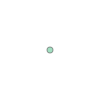

In [3]:
# создадим точку 
pt_1 = Point(10, 10)
pt_1

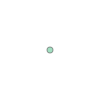

In [4]:
pt_2 = Point(100, 100)
pt_2

Вы также можете отобразить строковое представление объекта, просто обернув его в str() или преобразовав его в массив numpy, состоящий из его координат. Последний способ особенно полезен при работе с большими массивами геометрических объектов (например, более 6 млн полигонов из OSM), и если мы хотим делать вычисления в формате векторов, тогда numpy становится абсолютно незаменимым.

In [5]:
# преобразуем точку в строковый формат
str(pt_1)

'POINT (10 10)'

Существует также метод загрузки этого строкового представления обратно в геометрический формат, который очень пригодится, когда вам придется загружать данные, хранящиеся в негеометрическом формате, например из csv-файла.

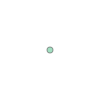

In [6]:
# преобразуем точку из строкового формата в геометрический
from shapely import wkt
wkt.loads(str(pt_1))

Если мы хотим отобразить несколько точек сразу и посмотреть как они расположены относительно друг друга, то необходимо использовать метод `GeometryCollection`.

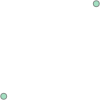

In [7]:
GeometryCollection([pt_1, pt_2])

Также можно считать расстояние между точками и смотреть их координаты.

In [8]:
# посчитаем расстояние между точками
pt_1.distance(pt_2)

127.27922061357856

In [9]:
# посмотрим на координаты точки
pt_1.x, pt_1.y, pt_1.xy

(10.0, 10.0, (array('d', [10.0]), array('d', [10.0])))

И прежде, чем перейти к линиям, скажем, что все объекты Shapely имеют аттрибут `.name`. Это может быть полезно, когда вы преобразуете каждый из полигонов из большой коллекции, хранящейся, например, в GeoPandas, в коллекцию меньших полигонов, и при этом хотите иметь возможность легко вернуться к исходным полигонам.

In [10]:
# зададим имя pt_1
pt_1.name = 'My Point'
pt_1.name

'My Point'

In [11]:
# посмотрим имя у pt_2
# мы должны получить ошибку, так как у данного объекта нет имени
pt_2.name

AttributeError: 'Point' object has no attribute 'name'

**Линии**

LineStrings создаются очень похожим образом, только на этот раз списком кортежей. Они могут пересекаться и проходить через одни и те же точки несколько раз, однако последнее не рекомендуется, так как это отрицательно влияет на производительности, и лучше разделять их на отдельные компоненты. Обратите внимание, что порядок точек важен, поскольку он определяет то, в какой очередности вы проходите через точки (то же самое относится и к полигонам).

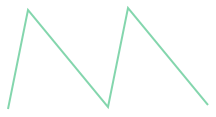

In [12]:
# создадим линию
ln = LineString([(0, 1), (20, 100), (100, 3), (120, 102), (200, 5)])
ln

Как и в случае с точками, вы можете преобразовать объект LineString в массив координат точек. Порядок здесь сохраняется, поэтому его можно легко использовать для быстрого получения координат первой и последней точки — удобно для построения древовидных объектов, представляющих дорожные сети, например.

In [13]:
np.array(ln)

array([[  0.,   1.],
       [ 20., 100.],
       [100.,   3.],
       [120., 102.],
       [200.,   5.]])

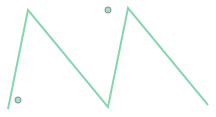

In [14]:
# объединим точки и линию
GeometryCollection([pt_1, pt_2, ln])

Также мы можем находить расстояние и проекции точек на прямую, а также длину линии.

In [15]:
# найдем расстояние от точки до линии
pt_1.distance(ln)

8.01980198019802

In [16]:
pt_2.distance(ln)

19.207920792079207

In [17]:
# найдем проекцию точки на линию
ln.project(pt_1)

10.801980198019802

In [18]:
# найдем длину линии 
ln.length

453.46769176178475

**Многоугольиники**

Создадим полигон.

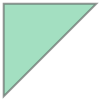

In [19]:
Polygon([(0,0),(1,1),(0,1)])

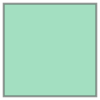

In [20]:
outer = Polygon(((0,0),(10,0),(10,10),(0,10),(0,0)))
inner = Polygon(((4,4),(4,6),(6,6),(6,4),(4,4)))
inner2 = Polygon(((2,2),(2,3),(3,3),(3,2),(2,2)))
outer

Многоугольники могут иметь отверстия внутри себя, и способ их определения следует простому правилу: `Polygon([список координат многоугольника], [список отверстий])`, где каждое отверстие само по себе является многоугольником. Обратите внимание, что полигоны, представляющие отверстия, должны либо полностью находиться внутри исходного полигона, либо касаться его не более чем в одном месте.

In [21]:
p = Polygon(outer.exterior.coords, [inner.exterior.coords,
                                    inner2.exterior.coords])

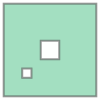

In [22]:
p

### GeoPandas

**GeoPandas** - это Pandas с функциональностью для анализа геоданных, то есть расширение функциональности pandas географическими абстракциями (унаследованными из Shapely), которые позволяют нам проводит аналитические географические операции с геоданными: выборки, оверлей, аггрегация (как, например, в PostGIS для Postgresql).

Напомню, что существует три базовых типа геометрии — точка, линия (а точнее, полилиния, так как состоит из соединенных отрезков) и полигон. У всех у них бывает вариант мульти-(Multi), где геометрия представляет собой объединение отдельных географических образований в один. Например, выход метро может быть точкой, но несколько выходов, объединенных в сущность "станция", уже являются мультиточкой.

Также существует множество различных форматов геопространственных файлов, таких как Shape-file, GeoJSON, KML и GPKG.

   - Shapefile - это самый распространенный тип файлов;
   - все эти типы файлов можно быстро загрузить с помощью функции gpd.read_file().
   
Для примера возьмем [данные](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm) о Нью-Йорке с [открытого портала данных](https://opendata.cityofnewyork.us/) о Нью-Йорке.

In [23]:
# для начала импортируем библиотеку
# установка: !pip install geopandas
import geopandas as gpd

In [24]:
import fiona

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
sml = gpd.read_file('smolensk.kml', driver='KML')
sml

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Name,Description,geometry
0,sml,,"POLYGON Z ((31.93679 54.82607 196.46513, 31.94..."


In [25]:
gpd.*?

gpd.GeoDataFrame
gpd.GeoSeries
gpd.__builtins__
gpd.__cached__
gpd.__class__
gpd.__delattr__
gpd.__dict__
gpd.__dir__
gpd.__doc__
gpd.__eq__
gpd.__file__
gpd.__format__
gpd.__ge__
gpd.__getattribute__
gpd.__gt__
gpd.__hash__
gpd.__init__
gpd.__init_subclass__
gpd.__le__
gpd.__loader__
gpd.__lt__
gpd.__name__
gpd.__ne__
gpd.__new__
gpd.__package__
gpd.__path__
gpd.__reduce__
gpd.__reduce_ex__
gpd.__repr__
gpd.__setattr__
gpd.__sizeof__
gpd.__spec__
gpd.__str__
gpd.__subclasshook__
gpd.__version__
gpd.array
gpd.base
gpd.clip
gpd.datasets
gpd.geodataframe
gpd.geopandas
gpd.geoseries
gpd.gpd
gpd.io
gpd.np
gpd.options
gpd.overlay
gpd.pd
gpd.plotting
gpd.points_from_xy
gpd.read_feather
gpd.read_file
gpd.read_parquet
gpd.read_postgis
gpd.show_versions
gpd.sindex
gpd.sjoin
gpd.tools

In [26]:
# импортируем данные
nyc_boroughs = gpd.read_file('NY_Borough_Boundaries/NY_Borough_Boundaries.shp')
nyc_boroughs

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1.0,Manhattan,6.366038e+08,361611.823950,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2.0,Bronx,1.187245e+09,464650.051822,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3.0,Brooklyn,1.934091e+09,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.044042e+09,900087.667215,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [27]:
# посмотрим на информацию о датафрейме
nyc_boroughs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   boro_code   5 non-null      float64 
 1   boro_name   5 non-null      object  
 2   shape_area  5 non-null      float64 
 3   shape_leng  5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 328.0+ bytes


In [28]:
# как можно заметить выше, столбец @ geometry @ имеет тип geometry
# посмотрим на тип объекта столбца geometry
type(nyc_boroughs.geometry[0]) # он должен иметь тип shapely

shapely.geometry.multipolygon.MultiPolygon

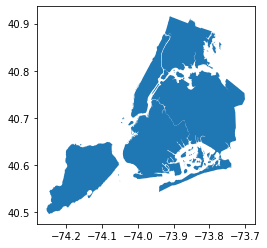

In [29]:
# нарисуем карту Нью-Йорка
# при вызову plot может возникнуть ошибка импорта пакета descartes
# для решения проблемы необходимо установить данную библиотеку conda install -c conda-forge descartes
nyc_boroughs.plot();

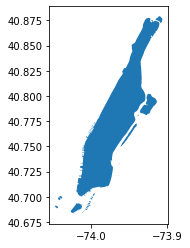

In [30]:
# отобразим Манхэттен
manhattan = nyc_boroughs[nyc_boroughs['boro_name'] == 'Manhattan'].reset_index(drop=True)
manhattan.plot();

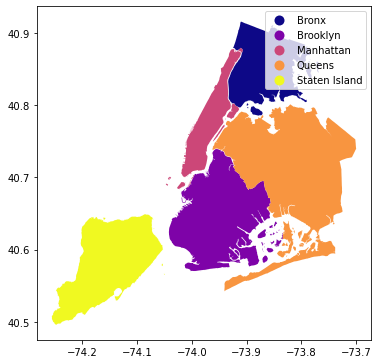

In [31]:
# отобразим районы Нью-Йорка
nyc_boroughs.plot(column = 'boro_name', linewidth=0.5, cmap='plasma', legend=True, figsize=(6,9));

### Folium

**Folium** - это библиотека, используемая для визуализации геопространственных данных. Это простая и в то же время мощная библиотека. Данная бибилотека является оболочкой Python для Leaflet.js - ведущей библиотеки JavaScript с открытым исходным кодом для построения интерактивных карт.

Установка Folium:
```python
!pip install folium
```

In [32]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

**Map**

Для определения долготы и широты можно использовать [данный сайт](https://u-karty.ru/opredelenie-koordinat-na-karte-yandex).

In [33]:
# создадим карту
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)
m_1

Как видно выше, мы создали интерактивную карту с помощью метода `folium.Map`, которому передали несколько параметров:
   - `location` задает начальный центр карты. Мы используем широту (42.32° N) и долготу (-71.0589° E) города Бостона.
   - `titles` задает стиль карты, в данном случае, мы выбрали OpenStreetmap;
   - `zoom_start` устанавливает начальный уровень масштабирования карты.
   
Заметьте, что мы можем двигать и масштабировать карту, как нам угодно.

**Layers и Tiles**

Tileset - это набор растровых и векторных данных, разбитых на однородную квадратную сетку, состоящую из tile'ов. Каждый tileset имеет свой способ представления данных на карте. Folium позволяет нам создавать карты с различными видами тайлов, такими как Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron и многие другие. По умолчанию тип тайлов установлен OpenStreetMap.

Каждый tileset показывает разные особенности карты и подходит для разных целей. Например, Stamen Terrain имеет hill shading (затенение холмов) и поддерживает естественные цвета растительности.А CartoDB Dark Matter показывает карту CartoDB Positron в темном режиме.

In [34]:
# посмотрим на разные типы карт
from branca.element import Figure

fig2=Figure(width=550,height=350)
m2=folium.Map(location=[28.644800, 77.216721])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

**Markers**

Markers - это элементы, используемые для обозначения местоположения на карте. Например, когда вы используете Google карты для навигации, ваше местоположение отмечается маркером, а пункт назначения - другим маркером. Маркеры - одни из самых важных и полезных элементов на карте.

Folium предоставляет класс folium.Marker для нанесения маркеров на карту. Нужно просто передать широту и долготу местоположения, указать всплывающее окно и всплывающую подсказку и добавить их на карту.

In [35]:
# создадим маркеры на карте 
m = folium.Map(location=[55.7516,37.6188], zoom_start=15)

tooltip = "Нажми на меня!"

folium.Marker(
    [55.7516,37.6188], popup="<b>Кремль</b>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [55.7531,37.6095], popup="<b>Александровский парк</b>", tooltip=tooltip
).add_to(m)

m

**Circle и Circle Marker**

In [36]:
m = folium.Map(location=[59.9400,30.3145], tiles="Stamen Toner", zoom_start=13)

folium.Circle(
    radius=100,
    location=[59.9342,30.3062],
    popup="Иссакиевский собор",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[59.9400,30.3145],
    radius=30,
    popup="Дворцовая площадь",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


m

**Choroplete (картограммы/хороплеты)**

In [37]:
# создадим картограмму штатов США

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)
m

**Heatmap**

In [38]:
# создадим искусственные данные
data = (
    np.random.normal(size=(100, 3)) * np.array([[1, 1, 1]]) + np.array([[48, 5, 1]])
).tolist()

# создадим хитмап
m = folium.Map([48.0, 5.0], zoom_start=6)
HeatMap(data).add_to(m)
m

### Дополнительная информация

**Общая информация**
   - Воркшоп по основам анализа геоданных в Python: https://www.youtube.com/watch?v=3m0kVWYw53Y&t=1961s
   - Короткий курс на Kaggle: https://www.kaggle.com/learn/geospatial-analysis


**Карты и данные**
   - Карта OpenStreetMap: https://www.openstreetmap.org/#map=17/40.78926/-73.95789
   - Карты России: https://wiki.openstreetmap.org/wiki/RU:%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F/%D0%9A%D0%B0%D1%80%D1%82%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8
   - Карта ДТП: https://dtp-stat.ru/
   - Статья на Хабре о OSM: https://habr.com/ru/post/270513/
   - Статья на Хабре о карте ДТП: https://habr.com/ru/post/438700/
   - Справочник информации о городах России: https://github.com/hflabs/city
   - Еще один справочник: https://dadata.ru/api/
   - Платформа для геоаналитики Geointellect: https://geointellect.com/#about-10
   - https://www.worldpop.org/

**Shapely**
   - https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

**GeoPandas**
   - https://github.com/geopandas/geopandas
   - https://www.kaggle.com/alexisbcook/your-first-map
   - https://habr.com/ru/company/ods/blog/338554/
   
**Folium**
   - https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/
   - https://www.kaggle.com/alexisbcook/interactive-maps
   - https://python-visualization.github.io/folium/quickstart.html

**Применение ML к геоданным**
   - Разметка аэрофотоснимков по зашумленным данным: https://www.cs.toronto.edu/~vmnih/docs/noisy_maps.pdf
   - https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec
   - https://medium.com/dataseries/mapping-and-building-machine-learning-algorithms-on-geodata-with-r-29cfe2ad982b